In [162]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# update import path
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..', 'src'))

from polar import Polar

In [125]:
data = pd.read_csv('../data/polars/ff95-skip-intro.csv', delimiter=';')
data = data.rename(columns={'twa/tws': 'twa'})
data = data.set_index('twa')
data.columns = data.columns.astype('int')
data

,6,8,10,12,14,16,20
twa,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
52,5.56,6.36,6.61,6.72,6.78,6.82,6.91
60,5.92,6.63,6.83,6.92,7.00,7.04,7.16
75,6.24,6.85,7.09,7.23,7.35,7.45,7.53
90,6.24,6.85,7.20,7.51,7.71,7.87,8.15
110,5.58,6.63,7.14,7.63,8.14,8.49,8.96
120,5.41,6.51,7.07,7.60,8.12,8.52,9.49
135,4.89,6.03,6.77,7.24,7.80,8.44,9.97
150,4.15,5.22,6.16,6.79,7.23,7.74,8.97


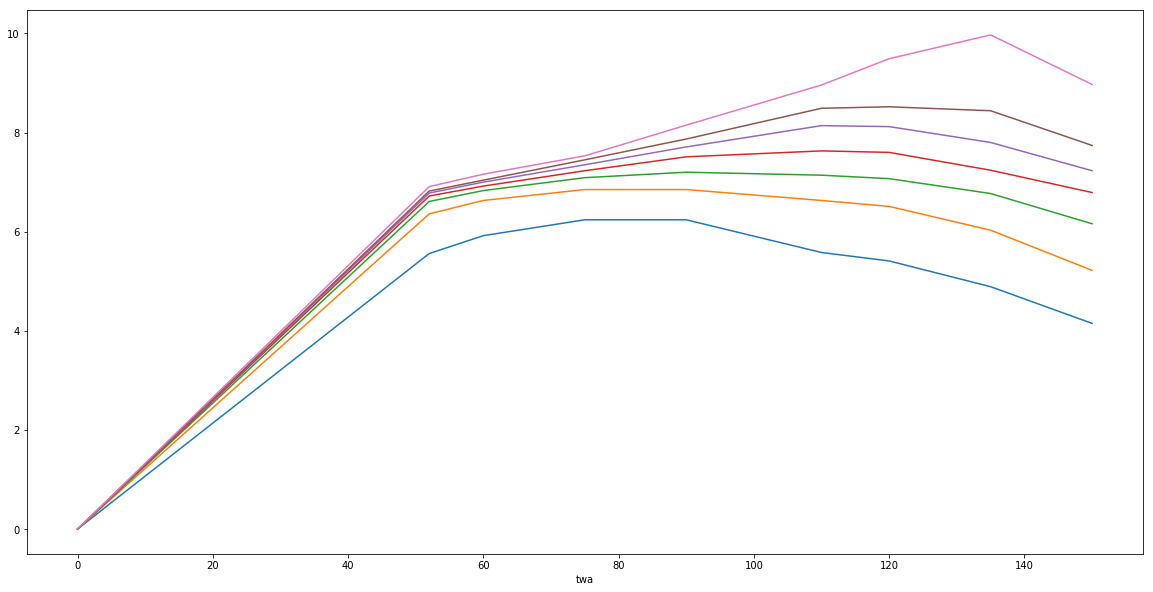

In [129]:
def show(data):
    _, ax = plt.subplots(figsize=(20, 10))
    tws_list = [6,8,10,12,14,16,20]
    for tws in tws_list:
        data[tws].plot(ax=ax)
    plt.show()

show(data)

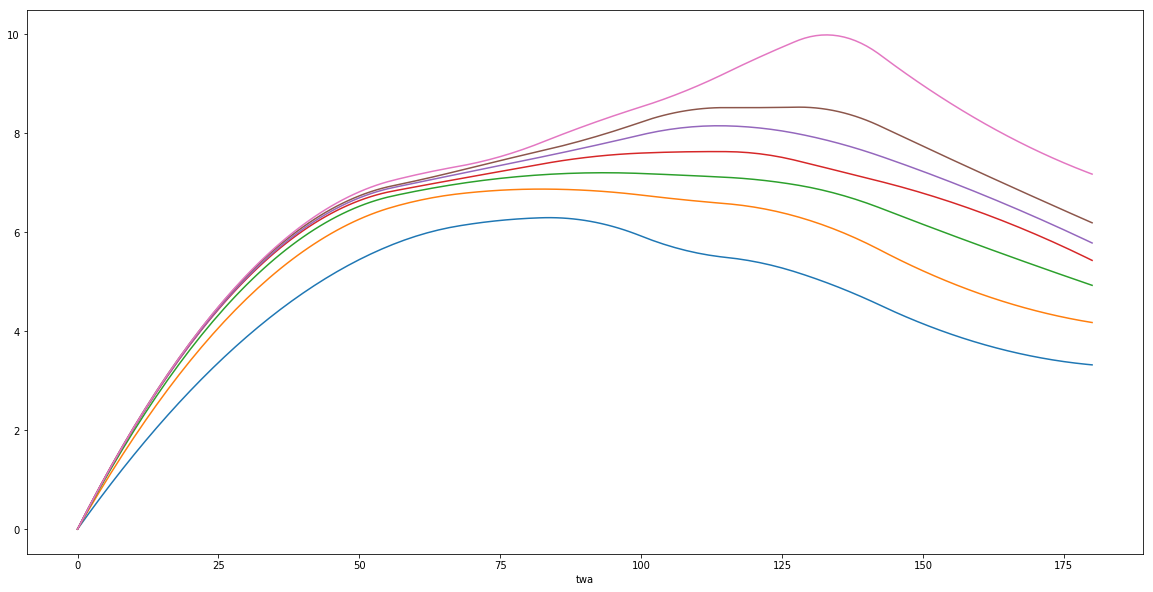

In [158]:
idx = np.arange(0, 181, 1)
df = data.reindex(idx)
df.iloc[180] = df.iloc[150] * 0.8
df.interpolate(method='polynomial', order=2, inplace=True)
show(df)
#df

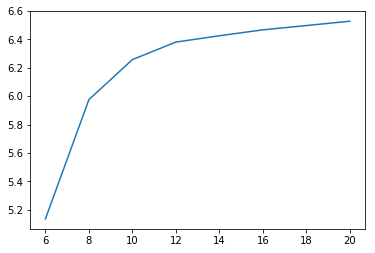

In [144]:
df.iloc[45].plot()

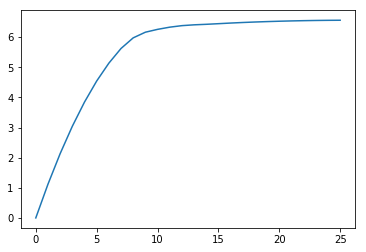

In [159]:
idx = np.arange(0, 26, 1)
series = df.iloc[45]
series[0] = 0
series[25] = series[20] * 1.005
series = series.reindex(idx).interpolate(method='polynomial', order=2)
series.plot()

In [169]:
polar = Polar('../data/polars/ff95-skip-intro.csv')
polar.get_speed(1, 20)

0.2216124931279118